1. 데이터 불러오기
2. info()
3. 결측치, 문제, 컬럼 Dtype
4. 중요변수 탐색
5. 상관 관계
 - 변수 분포
 - 종속변수와 독립변수의 상관관계
 - 독립변수간의 상관관계가 높으면 중복값이라는뜻
 - 차이가 많이나면 표준화 or 정규화
6. 변수 선택 ★

#### 실습 과제
mtcars.csv 데이터 셋에서 mpg 예측모델을 생성하기 위해 필요한 전처리 및 탐색적 분석을 수행한 결과로 데이터셋을 도출한 후 주어진 모델링 및 평가코드를 적용하여 결과를 출력하세요.

[데이터 셋 변수 설명]

- mpg: 연비(miles per gallon)
- cyl: 실린더 개수(number of cylinders)
- disp: 배기량(displacement)
- hp: 마력(horsepower)
- drat: 후륜비(rear axle ratio)
- wt: 차량 무게(weight)
- qsec: 1/4 마일 달성 시간(1/4 mile time)
- vs: 엔진 형태(V/S)
- am: 변속기 종류(automatic or manual)
- gear: 기어 수(number of gears)
- carb: 기화기 개수(number of carburetors)


In [5]:
import pandas as pd

#데이터 불러오기

file_path='/content/mtcars.csv'
df=pd.read_csv(file_path)

df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [24]:
#연비를 예측하는 모델
df

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [68]:
asd = df[['mpg','cyl','disp','hp','drat','wt','qsec','carb','gear','am','vs']].corr()
asd

,mpg,cyl,disp,hp,drat,wt,qsec,carb,gear,am,vs
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,-0.550925,0.480285,0.599832,0.664039
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,0.526988,-0.492687,-0.522607,-0.810812
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,0.394977,-0.555569,-0.591227,-0.710416
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,0.749812,-0.125704,-0.243204,-0.723097
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,-0.090790,0.699610,0.712711,0.440278
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,0.427606,-0.583287,-0.692495,-0.554916
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,-0.656249,-0.212682,-0.229861,0.744535
carb,-0.550925,0.526988,0.394977,0.749812,-0.090790,0.427606,-0.656249,1.000000,0.274073,0.057534,-0.569607
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.274073,1.000000,0.794059,0.206023
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.057534,0.794059,1.000000,0.168345


In [54]:
scaled_df = asd[['mpg','cyl','disp','hp','drat','wt','carb','am','vs']]

In [36]:
scaled_df = asd[['mpg','cyl','disp','hp','drat','wt','carb','am','vs']]
scaled_data = scaled_df[['cyl','disp','hp','drat','wt','carb','am','vs']]

In [46]:
asd = df[['cyl','disp','hp','drat','wt','qsec','carb','gear','am','vs']]

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

# 회귀 모델 구축
X = scaled_data
y = 'mpg'
# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared: {round(r2,2)}")

ValueError: Found input variables with inconsistent numbers of samples: [11, 3]

ValueError: x and y must be the same size

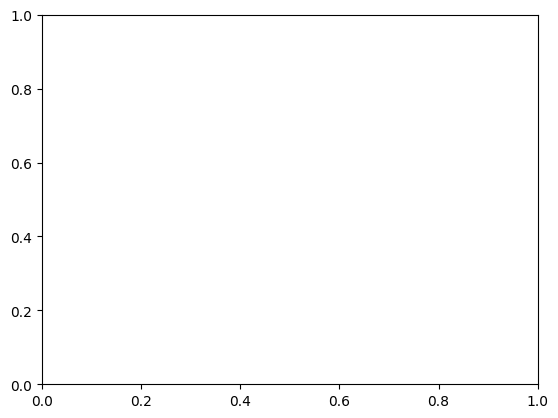

In [66]:
import matplotlib.pyplot as plt
X = scaled_data
y = scaled_df['mpg']
plt.scatter(X, y)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

# 회귀 모델 구축
X = scaled_df.drop(columns=[target_variable])
y = scaled_df[target_variable]

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared: {round(r2,2)}")

NameError: name 'target_variable' is not defined